<a href="https://colab.research.google.com/github/JadeRazzaghi/Full-Sent-classification-Sklearn/blob/main/Bert_for_Hate_profanity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded=files.upload()

Saving FinalData.csv to FinalData.csv


In [9]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['FinalData.csv']), encoding='Latin_1')


In [10]:
data.head()

,Tweets,Type,Target,Language,Theme,Goal,Speech-Acts,Religion,Race,Emotions,Unnamed: 10
0,Sing..Nigger...dance Nigger....die...Nigger......,1,2,2,2,1,1,0,2,0,NaN
1,he called me a nigger then flopped on the char...,0,0,0,0,0,0,0,0,0,NaN
2,"@Naiyaaaa_ Nigger is playing for all teams, si...",0,0,0,0,0,0,0,0,0,NaN
3,Paul Mooney was one of the funniest no holds b...,0,0,0,0,0,0,0,0,3,NaN
4,@kingmookz Bruh shit had me confused as hell c...,0,0,0,0,0,0,0,0,5,NaN


In [11]:
data=data.drop(['Unnamed: 10'], axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10276 entries, 0 to 10275
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweets       10276 non-null  object
 1   Type         10276 non-null  int64 
 2   Target       10276 non-null  int64 
 3   Language     10276 non-null  int64 
 4   Theme        10276 non-null  int64 
 5   Goal         10276 non-null  int64 
 6   Speech-Acts  10276 non-null  int64 
 7   Religion     10276 non-null  int64 
 8   Race         10276 non-null  int64 
 9   Emotions     10276 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 802.9+ KB


In [13]:
data.shape

(10276, 10)

In [14]:
import re
from spacy.lang.en.stop_words import STOP_WORDS
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#Preprocessing step:
def char_no_space(a):
    word=a.split()
    a="".join(word)
    return len(a)

In [16]:
def avrg_w(a):
    word=a.split()
    a="".join(word)
    return len(a)/len(word)

In [3]:
#contraction to expansion:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "i had / i would",
"i'd've": "i would have",
"i'll": "i shall / I will",
"i'll've": "i shall have / i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [17]:
def exp(x):
    if type(x) is str:
        for key in contractions:
            value=contractions[key]
            x=x.replace(key,value)
        return x
    else:
        return x

In [18]:
data['WordCount']=data['Tweets'].apply(lambda x: len(x.split()))
data['CharCount']=data['Tweets'].apply(lambda x: char_no_space(x))
data['AvrgWlen']=data['Tweets'].apply(lambda x: avrg_w(x))
data['Hashtag#']=data['Tweets'].apply(lambda x:len([t for t in  x.split() if t.startswith ('#')]))
data['Mention@']=data['Tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))
data['Tweets']=data['Tweets'].apply(lambda x: exp(x))
data['Tweets']=data['Tweets'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)',"",x))
data['Tweets']=data['Tweets'].apply(lambda x: re.sub('RT',"",x))
data['Tweets']=data['Tweets'].apply(lambda x: re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?',"",x))
data['Tweets']=data['Tweets'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())
data['Tweets']=data['Tweets'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))
data['Tweets']=data['Tweets'].apply(lambda x: x.lower())
data['Tweets']=data['Tweets'].apply(lambda x: re.sub(r'[^A-Z a-z 0-9-]+', "",x))
data['Tweets']=data['Tweets'].apply(lambda x: " ".join(x.split()))

In [20]:
Ls=['Type', 'Target', 'Language', 'Theme', 'Goal', 'Speech-Acts',
       'Religion', 'Race', 'Emotions', 'WordCount', 'CharCount', 'AvrgWlen',
       'Hashtag#', 'Mention@']
Labels=data[Ls]

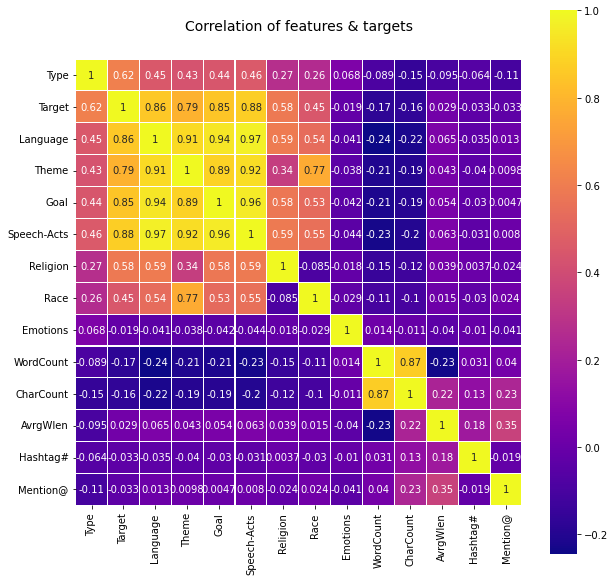

In [21]:
colormap = plt.cm.plasma
plt.figure(figsize=(10,10))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(Labels.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [22]:
hp_data=pd.concat([data[data['Type']==1], data[data['Type']==2]])

In [45]:
hp_data['Type']=hp_data['Type'].replace([1,2],[1,0])

In [46]:
hp_data.shape

(3395, 15)

In [47]:
X=hp_data['Tweets']
y=hp_data['Type']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)


In [ ]:
!pip install tensorflow_text

In [31]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [33]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [49]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']


In [50]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [36]:
len(X_train)

2546

In [51]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [52]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
80/80 [==============================] - 55s 655ms/step - loss: 0.6374 - accuracy: 0.6654 - precision: 0.6887 - recall: 0.9409
Epoch 2/10
80/80 [==============================] - 52s 653ms/step - loss: 0.5965 - accuracy: 0.6893 - precision: 0.6925 - recall: 0.9898
Epoch 3/10
80/80 [==============================] - 52s 653ms/step - loss: 0.5710 - accuracy: 0.6972 - precision: 0.7010 - recall: 0.9795
Epoch 4/10
80/80 [==============================] - 52s 652ms/step - loss: 0.5541 - accuracy: 0.7109 - precision: 0.7152 - recall: 0.9665
Epoch 5/10
80/80 [==============================] - 52s 652ms/step - loss: 0.5422 - accuracy: 0.7255 - precision: 0.7277 - recall: 0.9630
Epoch 6/10
80/80 [==============================] - 52s 653ms/step - loss: 0.5276 - accuracy: 0.7333 - precision: 0.7354 - recall: 0.9591
Epoch 7/10
80/80 [==============================] - 52s 652ms/step - loss: 0.5167 - accuracy: 0.7357 - precision: 0.7405 - recall: 0.9505
Epoch 8/10
80/80 [================

In [53]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 19s 644ms/step - loss: 0.4986 - accuracy: 0.7691 - precision: 0.7746 - recall: 0.9386


[0.4985867738723755,
 0.7691401839256287,
 0.7746478915214539,
 0.9385665655136108]

In [54]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [55]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
#y_predicted

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[103, 160],
       [ 36, 550]])

Text(33.0, 0.5, 'Truth')

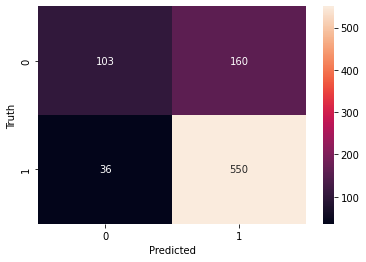

In [57]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.74      0.39      0.51       263
           1       0.77      0.94      0.85       586

    accuracy                           0.77       849
   macro avg       0.76      0.67      0.68       849
weighted avg       0.76      0.77      0.74       849



In [61]:
reviews = [
    'Fuck off Joe, you dont know me',
    'Muslims are trying to sabotage our country! we need to be united against them.',
    'Yo shut up you shithead',
    'Jews are crual and they deserve to die',
    'Pack your bag and go home beaner.'
]
model.predict(reviews)

array([[0.37568536],
       [0.8778767 ],
       [0.4792467 ],
       [0.8047493 ],
       [0.7823653 ]], dtype=float32)

In [ ]:
# the prediction for those sentences came out correct.